In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

import matplotlib.pyplot as plt
import operator

In [2]:
name=[]
link=[]
for i in range(1,9):
    page = requests.get("https://www.imdb.com/title/tt0944947/episodes?season="+str(i))
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()
        for eachEpisode in soup.findAll('a', attrs={'itemprop':["name"]}):
            name.append(eachEpisode.get_text())
            link.append(eachEpisode['href'])
print(len(name))
print(link)

73
['/title/tt1480055/', '/title/tt1668746/', '/title/tt1829962/', '/title/tt1829963/', '/title/tt1829964/', '/title/tt1837862/', '/title/tt1837863/', '/title/tt1837864/', '/title/tt1851398/', '/title/tt1851397/', '/title/tt1971833/', '/title/tt2069318/', '/title/tt2070135/', '/title/tt2069319/', '/title/tt2074658/', '/title/tt2085238/', '/title/tt2085239/', '/title/tt2085240/', '/title/tt2084342/', '/title/tt2112510/', '/title/tt2178782/', '/title/tt2178772/', '/title/tt2178802/', '/title/tt2178798/', '/title/tt2178788/', '/title/tt2178812/', '/title/tt2178814/', '/title/tt2178806/', '/title/tt2178784/', '/title/tt2178796/', '/title/tt2816136/', '/title/tt2832378/', '/title/tt2972426/', '/title/tt2972428/', '/title/tt3060856/', '/title/tt3060910/', '/title/tt3060876/', '/title/tt3060782/', '/title/tt3060858/', '/title/tt3060860/', '/title/tt3658012/', '/title/tt3846626/', '/title/tt3866836/', '/title/tt3866838/', '/title/tt3866840/', '/title/tt3866842/', '/title/tt3866846/', '/title/t

In [3]:
data=[]
for i in range(len(name)):
    #print(z)
    sublink="https://www.imdb.com"+link[i]
    page = requests.get(sublink)
    #page = requests.get("https://www.imdb.com/title/tt1480055/?ref_=ttep_ep1")
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()

        title=soup.find('div', attrs={'class':["titleBar"]}).find("h1").get_text().strip()
        #print(title)
        
        #director=soup.find('div', attrs={'class':["credit_summary_item"]}).find('a').get_text()
        #print(director)
        directorArrays=[]
        director=soup.find('div', attrs={'class':["credit_summary_item"]}).findAll('a')
        for x in director:
            directorArrays.append(x.get_text())
            
        rating=soup.find('div', attrs={'class':["imdbRating"]}).find("strong").get_text()
        #print(rating)
        
        airdate=soup.find('div', attrs={'class':["subtext"]}).find('a', title="See more release dates").get_text().strip()
        #print(airdate)
        
        season_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[0].strip()
        #print(season_number)
        
        episode_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[1].strip()
        #print(episode_number)
        
        storyline=soup.find('div', attrs={'class':["inline canwrap"]}).find('span').get_text().strip()
        #print(storyline)

        #Genres
        p=soup.find('div', attrs={'class':["see-more inline canwrap"]}).find('h4').get_text()
        if p=='Plot Keywords:':
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[1].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())
            #print(genres)
        else:
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[0].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())

        #Cast
        cast=soup.find('table', attrs={'class':["cast_list"]}).findAll('tr', attrs={'class':["odd","even"]})
        castArrays=[]
        for each in cast:
            castArrays.append(each.get_text().split("\n")[4][1:])
        #print(castArrays)

        #Character
        characterArrays=[]
        character=soup.findAll('td', attrs={'class':["character"]})
        for x in character:
            characterArrays.append(x.get_text().split('\n')[1].strip())
        #print(characterArrays)
        data.append((title, directorArrays, rating, airdate, season_number, episode_number, storyline, genres, castArrays, characterArrays))
        #print('\n')
#print(data)

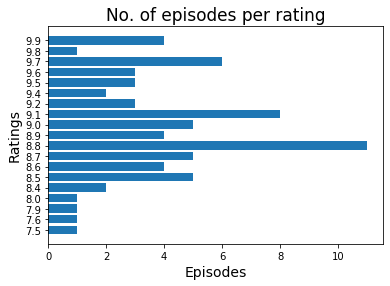

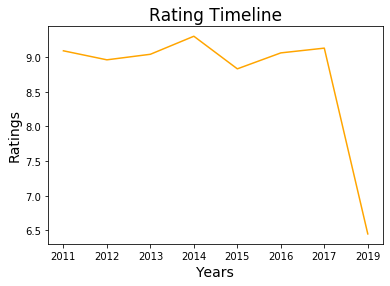

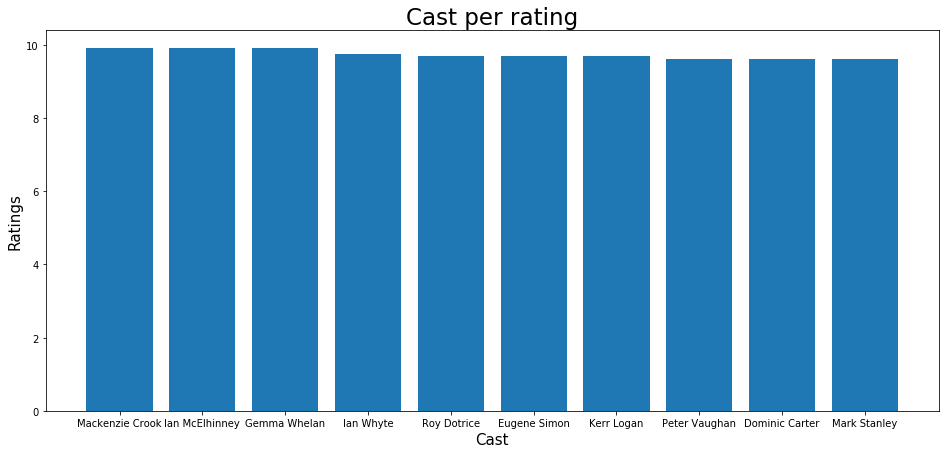

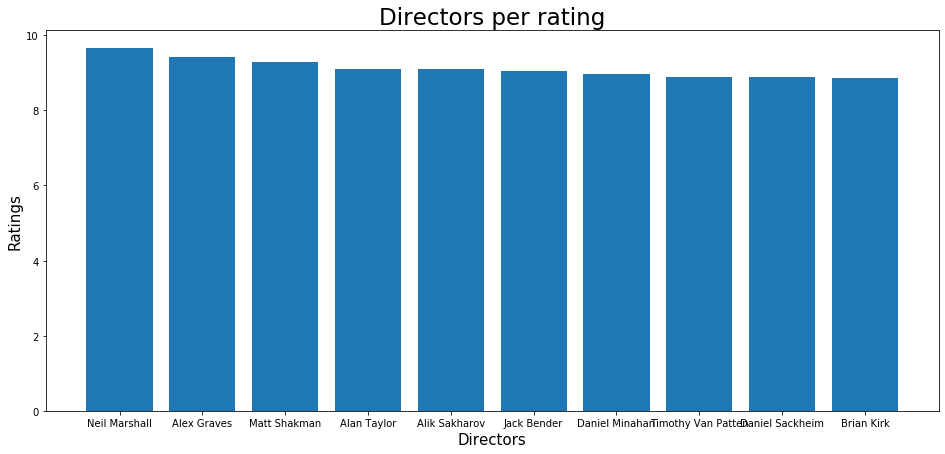

In [43]:
got_series = pd.DataFrame(data, columns = ['title', 'director', 'rating', 'airdate', 'season_number', 'episode_number', 'storyline', 'genres', 'cast', 'character'])
# got_series
# got_series.to_csv(r'C:\Users\Heda\OneDrive\Desktop\BIA 660\Project\GOT.csv')


# ***********************************************************************************

# seasonNumber = ""
# ratingCount = 0
# totalCount = 0
# average=[]
# seasonNumberWord=[]

# i = 0
# while i<len(got_series['season_number']):
#     seasonNumber = got_series['season_number'][i]
#     ratingCount = 0
#     totalCount = 0
    
#     for index in range(0, len(got_series)):
#         if(seasonNumber == got_series['season_number'][index]):
#             ratingCount+=float(got_series['rating'][index])
#             totalCount+=1
#             i+=1

#     seasonNumberWord.append(seasonNumber)
#     average.append(ratingCount/totalCount)


# mydf = pd.DataFrame({
#         'rating': average,
#         'Seasons': seasonNumberWord
#     })
# ax = plt.gca()

# mydf.plot(kind='bar',x='Seasons',y='rating',legend=False, ax=ax)
# ax.set_xlabel("rating")
# ax.set_ylabel("Seasons")
# ax.set_title('Average rating per episodes')



# ************************* No. of Episodes per rating bar graph ***************************************

myRating =[]
# myRating = [round(float(x)) for x in got_series['rating']]
myRating = [float(x) for x in got_series['rating']]
# print(myRating)

myRating2 = []
for a in myRating:
    if a>=7:
        myRating2.append(a)
        
# my_dict_Count = {i:myRating.count(i) for i in myRating}
my_dict_Count = {i:myRating2.count(i) for i in myRating2}



# for i in range(0,10):
#     if i+1 not in my_dict_Count:
#         my_dict_Count[i+1] = 0

# print(my_dict_Count)
mySorted = {}

for key in sorted(my_dict_Count.keys()):
    mySorted[key] = my_dict_Count[key]

# print(mySorted)
plt.barh(range(len(mySorted)), mySorted.values(), align='center')
plt.yticks(range(len(mySorted)), mySorted.keys())
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('No. of episodes per rating', fontsize=17)

plt.show()





# ************************* Rating TimeLine ***************************************

years = []
for index in range(0, len(got_series)):
    if got_series['airdate'][index].split()[4] not in years:
        years.append(got_series['airdate'][index].split()[4])

seasonNumber = ""
ratingCount = 0
totalCount = 0
average=[]
# seasonNumberWord=[]
i = 0
while i<len(got_series['season_number']):
    seasonNumber = got_series['season_number'][i]
    ratingCount = 0
    totalCount = 0
    
    for index in range(0, len(got_series)):
        if(seasonNumber == got_series['season_number'][index]):
            ratingCount+=float(got_series['rating'][index])
            totalCount+=1
            i+=1

#     seasonNumberWord.append(seasonNumber)
    average.append(ratingCount/totalCount)
    

plt.plot(years, average, color='orange')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('Rating Timeline', fontsize=17)
plt.show()


# ************************* Cast average Rating ***************************************
castArray = []

for j in range(0, len(got_series)):
    for i in range(0, len(got_series['cast'][j])):
        if got_series['cast'][j][i] not in castArray:
            castArray.append(got_series['cast'][j][i])

castRating = 0
totalCastRating = 0
castRatingArray = []
topCastRating = {}
topCastRating1 = {}

for k in range(0, len(castArray)):
    
    castRating = 0
    totalCastRating = 0
    
    for l in range(0, len(got_series)):
        if castArray[k] in got_series['cast'][l]:
            castRating+=float(got_series['rating'][l])
            totalCastRating+=1
    topCastRating[castArray[k]] = castRating/totalCastRating
    castRatingArray.append(castRating/totalCastRating)


for r in sorted(topCastRating, key=topCastRating.get, reverse=True)[:10]:
    topCastRating1[r] = topCastRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topCastRating1.items()))
plt.xlabel('Cast', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Cast per rating', fontsize=23)
plt.show()



# ************************* Director average Rating ***************************************
directorArray = []

for j in range(0, len(got_series)):
#     print('Anna Fleix' in bb_series['Director'][j])
    for i in range(0, len(got_series['director'][j])):
        if got_series['director'][j][i] not in directorArray:
            directorArray.append(got_series['director'][j][i])


directorRating = 0
totalDirectorRating = 0
directorRatingArray = []
topDirectorRating = {}
topDirectorRating1 = {}

for k in range(0, len(directorArray)):
    
    directorRating = 0
    totalDirectorRating = 0
    
    for l in range(0, len(got_series)):
        if directorArray[k] in got_series['director'][l]:
            directorRating+=float(got_series['rating'][l])
            totalDirectorRating+=1
    topDirectorRating[directorArray[k]] = directorRating/totalDirectorRating
    directorRatingArray.append(directorRating/totalDirectorRating)


for r in sorted(topDirectorRating, key=topDirectorRating.get, reverse=True)[:10]:
    topDirectorRating1[r] = topDirectorRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topDirectorRating1.items()))
plt.xlabel('Directors', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Directors per rating', fontsize=23)
plt.show()


